In [1]:
import numpy as np
import pandas as pd

##### 1

##### 2

##### 3

##### 4

An important thing to understand is that with linked lists and binary trees, you are literally given objects in memory that contain data and pointers. With graphs, the graph doesn't literally exist in memory.

In fact, only the "idea" of the graph exists. The input will give you some information about it, and it's up to you to figure out how to represent and traverse the graph with code.

Many times, the nodes of a graph will be labeled from 0 to n - 1. The problem statement may or may not explicitly state the input is a graph. Sometimes there might be a story, and you need to determine that the input is a graph. For example, "there are n cities labeled from 0 to n - 1". You can treat each city as a node and each city has a unique label.

With binary trees, traversal was easy because at any given node, we only needed to reference node.left and node.right. This allowed us to focus only on the traversal (with DFS or BFS). With graphs, a node can have any number of neighbors. Before we start our traversal, we usually need to do some work to make sure that for any given node, we can immediately access all the neighbors of said node.

#### First input format: array of edges



In this input format, the input will be a 2D array. Each element of the array will be in the form [x, y], 
which indicates that there is an edge between x and y. The problem may have a story for these edges - using the cities example,
the story would be something like "[x, y] means there is a highway connecting city x and city y".

So, why can't we immediately start traversal? Let's say that we want to start a DFS from node 0 (sometimes the problem will state which node you should start from, sometimes you will need to figure this out yourself). When we're at node 0, how do we find the neighbors? We would need to iterate over the entire input to find all edges that include 0. When we move to a neighbor node, we would need to iterate over the entire input again to find all the neighbors of that node.

At every node, we would need to iterate over the entire input to find the neighbors. This is very slow!

Before starting the traversal, we can pre-process the input so that we can easily find all neighbors of any given node. Ideally, you want a data structure where you can give node as an argument and be returned a list of neighbors. The easiest way to accomplish this is using a hash map.

Let's say you had a hash map graph that mapped integers to lists of integers. We can iterate over the input and for each [x, y] pair, we can put y in the list associated with graph[x]. If the edges are undirected, we will also need to put x in the list associated with graph[y]. After building this hash map, we can do graph[0] and immediately have all the neighbors of node 0.


A good analogy for this: imagine you're on Facebook and you want to see a list of all your friends. However, the Facebook engineers decided to keep their graph in the form of an array of edges! You would need to look at every single connection in the world (which is likely in the hundreds of billions if not trillions) and find the connections that involve you. However, if the graph is built beforehand, you can easily just click the friends tab on your profile to see only your friends.

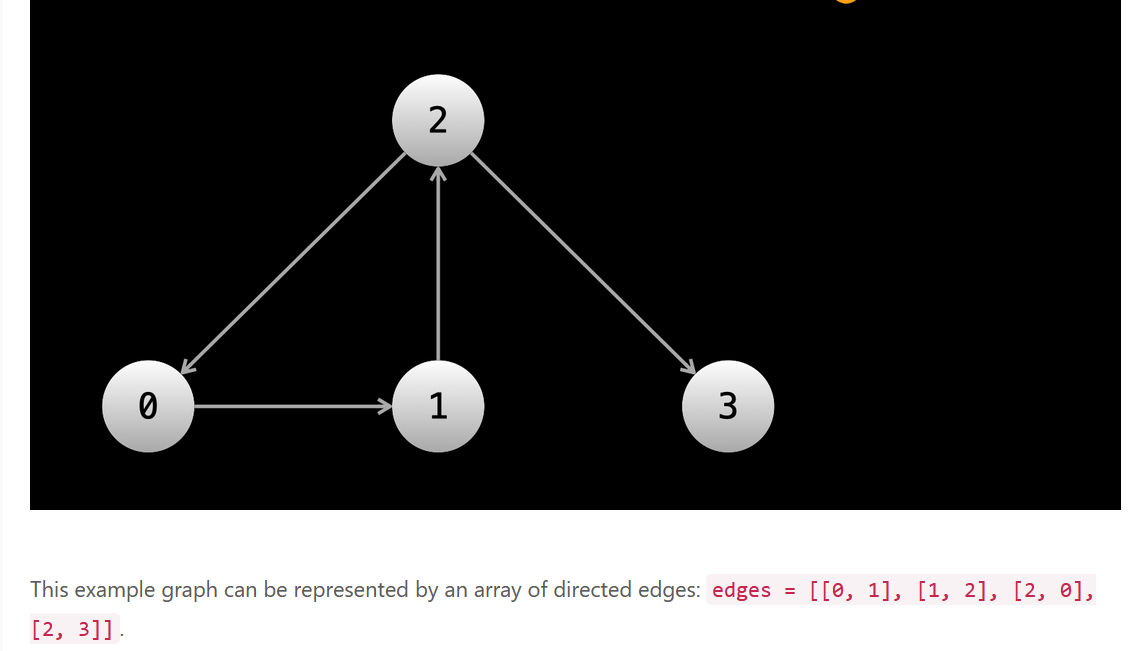

In [1]:
from collections import defaultdict
edges = [[0, 1], [1, 2], [2, 0], [2, 3]]

def build_graph(edges):
    graph = defaultdict(list)
    for x, y in edges:
        graph[x].append(y)
        # graph[y].append(x)
        # uncomment the above line if the graph is undirected
    
    return graph

build_graph(edges)

defaultdict(list, {0: [1], 1: [2], 2: [0, 3]})

#### Second input format: adjacency list

In an adjacency list, the nodes will be numbered from 0 to n - 1. The input will be a 2D integer array, let's call it graph. graph[i] will be a list of all the outgoing edges from the ith node.

The graph in the image above can be represented by the adjacency list graph = [[1], [2], [0, 3], []].

Notice that with this input, we can already access all the neighbors of any given node. We don't need to do any pre-processing! This makes an adjacency list the most convenient format. If we want all the neighbors of node 6, we just check graph[6].

#### Third input format: adjacency matrix

The next format is an adjacency matrix. Once again, the nodes will be numbered from 0 to n - 1. You will be given a 2D matrix of size n x n, let's call it graph. If graph[i][j] == 1, that means there is an outgoing edge from node i to node j. For example:

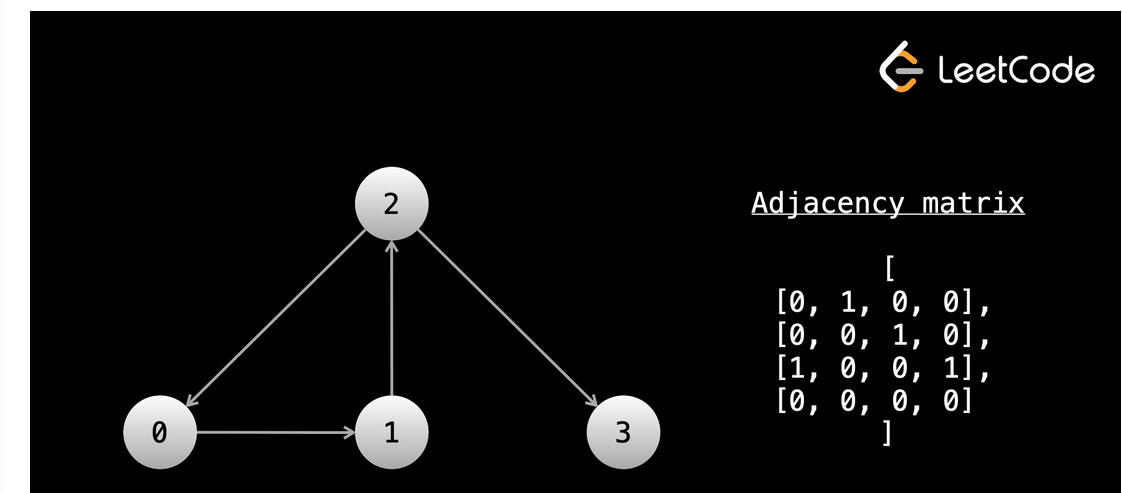

When given this format, you have two options. During the traversal, at any given node you can iterate over graph[node], and if graph[node][i] == 1, then you know that node i is a neighbor. Alternatively, you can pre-process the graph as we did with an array of edges. Build a hash map and then iterate over the entire graph. If graph[i][j] == 1, then put j in the list associated with graph[i]. This way, when performing the traversal, you will not need to iterate n times at every node to find the neighbors. This is especially useful when nodes have only a few neighbors and n is large.

Both of these approaches will have a time complexity of O(n2)

#### Last input format: matrix

The last format we'll talk about is more subtle but very common. The input will be a 2D matrix and the problem will describe a story. Each square will represent something, and the squares will be connected in some way. For example, "Each square of the matrix is a village. Villages trade with their neighboring villages, which are the villages directly above, to the left, to the right, or below them."

In this case, each square (row, col) of the matrix is a node, and the neighbors are (row - 1, col), (row, col - 1), (row + 1, col), (row, col + 1) (if in bounds).

Unlike other input formats, the nodes in these graphs are not numbered 0 until n. Instead, each element in the matrix represents a node. The edges are determined by the problem description, not the input. In the example given above, the problem description states that villages trade with those directly adjacent to them. Thus, the edges are those within 1 square. You will need to carefully think about the problem to understand these kinds of graphs.

#### Code differences between graphs and trees

There are a few big differences between solving graph problems and solving binary tree problems. While a binary tree has a root node to start traversal from, a graph does not always have an obvious "start" point.

For a binary tree, we are given objects for the nodes, and each node has a pointer to its children. In a graph, we might need to convert the input into a hash map first. When traversing a tree, we refer to node.left and node.right at each node. When traversing a graph, we will need to use a for loop to iterate over the neighbors of the current node, since a node could have any number of neighbors.

Implementation of DFS for graphs is similar to implementation for trees. Doing it recursively follows the same format: check for the base case, recursively call on all neighbors, do some logic to calculate the answer, and return the answer. You can also do it iteratively using a stack.

In any undirected graph or a directed graph with cycles, implementing DFS the same way we did with binary trees will result in an infinite cycle (remember linked list cycles? Imagine having your code walk in a circle forever!). Like with trees, in most graph questions, we only need to (and want to) visit each node once. To prevent cycles and unnecessarily visiting a node more than once, we can use a set seen. Before we visit a node, we first check if the node is in seen. If it isn't, we add it to seen before visiting it. This allows us to only visit each node once in O(1) time because adding and checking for existence in a set takes constant time.

#### Example 1:547.(Adjacency Matrix) Number of Provinces

In [5]:
# There are n cities. A province is a group of directly or indirectly connected cities and no other cities 
# outside of the group. You are given an n x n matrix isConnected where 
# isConnected[i][j] = isConnected[j][i] = 1 if the ith city and the jth city are directly connected, 
# and isConnected[i][j] = 0 otherwise. Return the total number of provinces.


In [6]:
# For convenience, we can convert the adjacency matrix to a hash map 
# that maps nodes to an array of their neighbors before starting.

In [8]:
#Step 1: Build Hashmap
#Step 2: Create a seen set to terminate dfs function
#Step 3: Build DFS [for neighbor in graph[node], if neighbor not in seen.....do something, 
#recursive setup(only if neighbor is not seen so this acts as a termination set)]
#Step 4: Increment on ans 

from collections import defaultdict

class Solution:
    def findCircleNum(self, isConnected: List[List[int]]) -> int:
        
        #here dfs function is just adding all connected nodes to seen at one complete recursive iteration
        def dfs(node):
            for neighbor in graph[node]:
                # the next 2 lines are needed to prevent cycles
                if neighbor not in seen:
                    seen.add(neighbor)
                    dfs(neighbor)
        
        # build the graph, undirected in this case
        n = len(isConnected)
        graph = defaultdict(list)
        
        for i in range(n):
            #upper triangular matrix of undirected adjacency matrix used to build hashmap  
            for j in range(i + 1, n):
                if isConnected[i][j]:
                    graph[i].append(j)
                    graph[j].append(i)
        
        seen = set()
        ans = 0
        
        for i in range(n):
            if i not in seen:
                # add all nodes of a connected component to the set
                ans += 1
                seen.add(i)
                dfs(i)
        
        return ans

In [12]:
#Ex1 : 
# isConnected = [[1,1,0],[1,1,0],[0,0,1]]
# output = 2

# Ex 3: isConnected =[[1,0,0],[0,1,0],[0,0,1]]
# output = 3

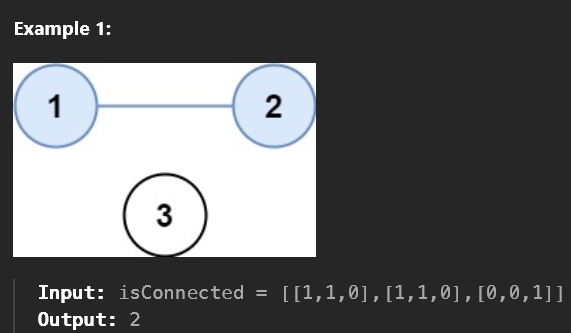

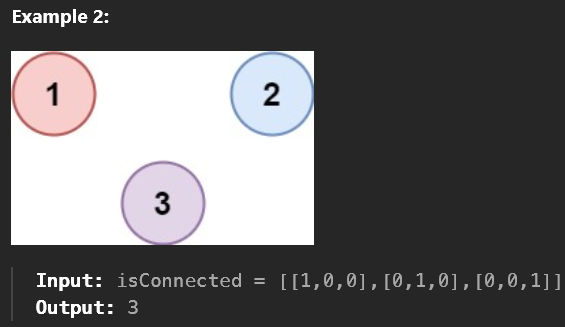

The time complexity of DFS on a graph is slightly different than when it is on a binary tree. With binary tree questions, we argued that each node is visited at most once, and each visit cost O(1). With graphs, we also only visit each node at most once, but the work is not necessarily O(1), because there is a for loop that iterates over the node's neighbors.

The reason visits were O(1) in a binary tree is because a node could have at most 2 children/neighbors, so we didn't need a loop. We just referenced node.left and node.right. With a graph, a node could have any amount of neighbors, so we need a non-constant loop.

As such, the time complexity for DFS on graphs is usually O(n+e), where n is the number of nodes and e is the number of edges. In the worst-case scenario where every node is connected with every other node, e = nC2.

Each node is visited only once
We iterate over a node's edges only when we are visiting that node
Because we can only visit a node once, a node's edges are only iterated over once
Therefore, all edges are iterated over only once, which costs O(e)

This is similar to the argument we made in the sliding window article that justified an O(n) time complexity despite the nested while loop. The nested while loop could only iterate n times across the entire algorithm. Here, the for loop inside the function iterates e times total across the entire algorithm.

Technically in this problem, the time complexity is O(n2) because the input is given as an adjacency matrix, so we always need O(n2) to build the hash map. The e is dominated by n2 (because O(e<n2)), so it can be ignored.


#### Example 2: 200. (Matrix) Number of Islands

In [13]:
# Given a m x n 2D binary grid which represents a map of 1 (land) and 0 (water), return the number of islands.
# An island is surrounded by water and is formed by connecting adjacent land cells horizontally or vertically.



It seems this problem is very similar to the previous one. In fact, it is the exact same problem (find the number of connected components in an undirected graph), the format of the graph is just different. Let's use the same algorithm, but implemented according to this new format.


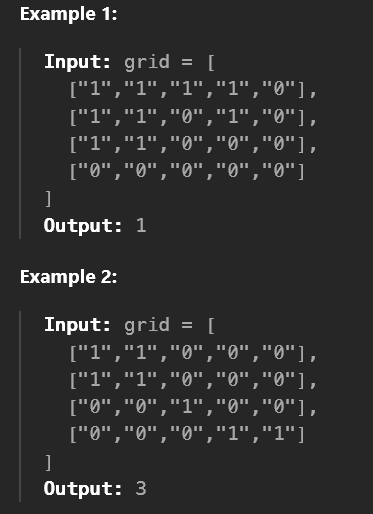

In [ ]:
# Step 1: set nested for loops to iterate across r rows and along n columns 
# and check if row,col is 1 and not in seen, increment ans, add in seen then go to all its neighbor in dfs
# for each node use directions to get all neighbors, check if neighbors are valid row,col in mxn space and is land
# for all valid neighbors and neighbors not in seen add to seen and do recursive set p for neighbors of neighbors


class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        
        # important to validate before visiting a node
        def valid(row, col):
            return 0 <= row < m and 0 <= col < n and grid[row][col] == "1"
        
        
        #here dfs function is just adding all connected nodes to seen at one complete recursive iteration        
        def dfs(row, col):
            for dx, dy in directions:
                
                #notice why are we adding dy to row and dx to col, this is confusing
                next_row, next_col = row + dy, col + dx
                
                #very important step to terminate recursion
                if valid(next_row, next_col) and (next_row, next_col) not in seen:
                    seen.add((next_row, next_col))
                    dfs(next_row, next_col)

        #if you are starting at top left
        #check down, check right, check up, check left        
        
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        
        seen = set()
        ans = 0
        
        m = len(grid)
        n = len(grid[0])
        
        for row in range(m):
            for col in range(n):
                #if you dont add grid[row][col] == "1" then ans = mxn
                if grid[row][col] == "1" and (row, col) not in seen:
                    ans += 1
                    seen.add((row, col))
                    dfs(row, col)
        
        return ans

Some code differences: we only care about squares whose value is "1" (land). We can define a helper function valid that first checks if a given (row, col) is in bounds, and then checks if it is land. We can also declare an array directions that makes iterating over the 4 neighbors cleaner (this is a very common practice).

Note: we can avoid using the set here by modifying the input. The point of the set is to avoid visiting the same square multiple times. We only visit squares with values "1", so instead of putting a square in a set, we could just change that square's value to "0". However, some interviewers may not want you to modify the input (especially if it is something passed by reference like an array).

We said before that DFS on a graph has a time complexity of O(nodes+edges).This was because we didn't know how many edges a given node could have. However, here the problem explicitly defines that a node can have (at most) 4 edges. Therefore, the work done at each node is once again O(1), and since we are only visiting each node once, the time complexity is equal to the number of nodes, which is O(m⋅n).

#### Example 3: 1466. (Array of edges) Reorder Routes to Make All Paths Lead to the City Zero

In [14]:
# There are n cities numbered from 0 to n - 1 and n - 1 roads such that there is only one way to 
# travel between two different cities. Roads are represented by connections 
# where connections[i] = [x, y] represents a road from city x to city y. The edges are directed. 
# You need to swap the direction of some edges so that every city can reach city 0. 
# Return the minimum number of swaps needed.


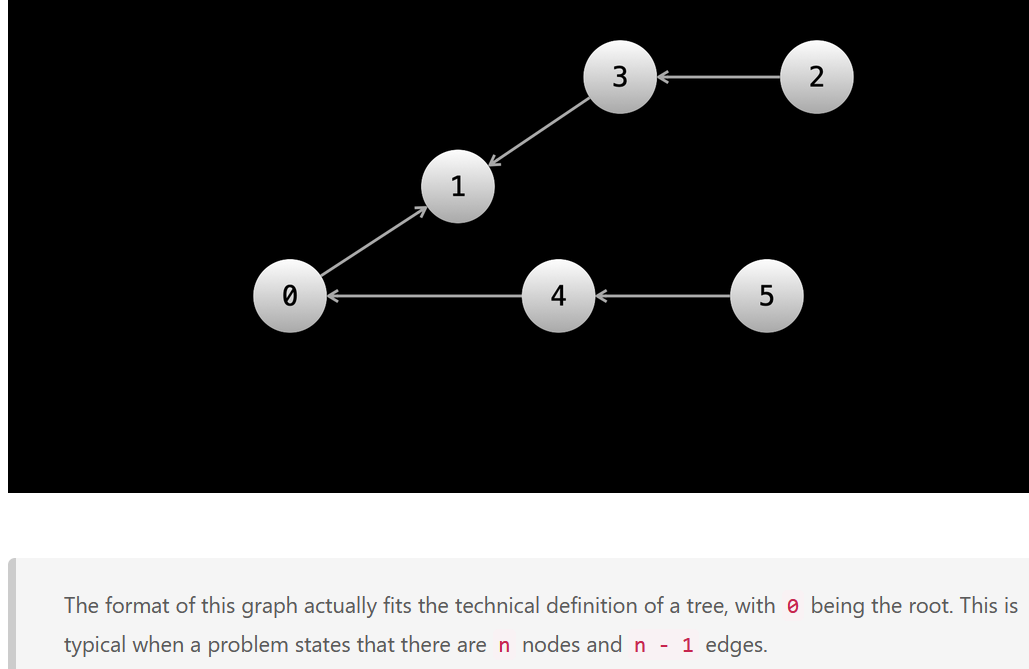

Here, we have a directed graph given as an array of edges. What edges do we need to swap? The problem states that there is only one way to travel between two different cities. We want every city to be able to reach 0, and because there is only one road between cities, all roads must be directed towards 0. This means we can traverse away from 0, and anytime we see that an edge is pointing away from 0, we know we need to swap it.

Although the graph is a directed graph, let's convert it into an undirected one so that we can reach all nodes from 0. Then, we can do a DFS starting at 0. Because our traversal direction is away from 0, at every node, every traversal to a neighbor that hasn't been visited will be away from 0. Therefore, if (node, neighbor) is in connections, we know we need to swap that road. To have fast O(1) checking for if a given edge is in connections, we can put the original directed edges in a set roads.

To summarize: we treat the graph as undirected just so that we can do a DFS starting at 0. During this DFS, every traversal we do is away from 0, so when we see an edge that we are crossing (node, neighbor) is in connections, we know we need to swap it (increment the answer).

In [ ]:
# Step 1: Create a hashmap, have existing roads/edges in a variable
#Step 2: Create DFS, this will start at 0 node and check for all neighbors and their neighbors,
# set up to count in recursive set up.

class Solution:
    def minReorder(self, n: int, connections: List[List[int]]) -> int:
        
        roads = set()
        graph = defaultdict(list)
        #here we are creating hashmap assuming its an undirected graph to access all nodes from 0
        for x, y in connections:
            graph[x].append(y)
            graph[y].append(x)
            roads.add((x, y))

        def dfs(node):
            ans = 0
            for neighbor in graph[node]:
                if neighbor not in seen:
                    if (node, neighbor) in roads:
                        ans += 1
                    seen.add(neighbor)
                    #make sure this runs only if neighbor is not in seen
                    ans += dfs(neighbor)
            
            return ans

        seen = {0}
        return dfs(0)

The time and space complexity of this algorithm is O(n) because we only visit each node once, do constant work, and are told the number of edges is n−1=O(n). roads, graph, and seen all take up at most O(n) space.

#### Example 4: 841. (Adjacecy List) Keys and Rooms

In [15]:
# There are n rooms labeled from 0 to n - 1 and all the rooms are locked except for room 0. 
# Your goal is to visit all the rooms. When you visit a room, you may find a set of distinct keys in it.
# Each key has a number on it, denoting which room it unlocks, and you can take all of them with you to unlock
# the other rooms. Given an array rooms where rooms[i] is the set of keys that you can obtain 
# if you visited room i, return true if you can visit all the rooms, or false otherwise.

In the previous 3 examples, we have seen a graph given as an adjacency matrix(numberof provinces), a graph in the form of a matrix(islands), and a graph given as an array of edges(reorder routes). Here, rooms[i] is an array of other rooms we can visit from the current room, which makes this a graph given as an adjacency list. We start at room 0 and need to visit every room. At every node i, the neighbors are rooms[i]. If we can start a DFS at 0 and visit every node, then the answer is true. How can we tell how many rooms we visited at the end of the DFS? All the nodes we visited are stored in seen.

In [17]:
class Solution:
    def canVisitAllRooms(self, rooms: List[List[int]]) -> bool:
        def dfs(node):
            for neighbor in rooms[node]:
                if neighbor not in seen:
                    seen.add(neighbor)
                    #make sure this runs only if neighbor is not in seen
                    dfs(neighbor)
            
        seen = {0}
        dfs(0)
        return len(seen) == len(rooms)

Adjacency lists are the most convenient input format when the nodes are numbered from 0 to n - 1 because we don't need to convert it to a hash map - it basically is already in that format. As such, the only extra space we use here is in seen and the recursion call stack, which both are O(n). The time complexity is O(n+e) as we visit each node once and the for loops inside each visit will iterate up to ee times total across the entire algorithm.

#### Example 5: 1557. Minimum Number of Vertices to Reach All Nodes

In [18]:
# Given a directed acyclic graph, with n vertices numbered from 0 to n-1, and an array edges 
# where edges[i] = [x, y] represents a directed edge from node x to node y. 
# Find the smallest set of vertices from which all nodes in the graph are reachable.

In [31]:
edges = [[1,2],[3,2],[4,1],[3,4],[0,2]]
n = 5

def findSmallestSetOfVertices( n, edges):
        
        def dfs(node):
            for neighbor in graph[node]:
                if neighbor not in seen:
                    seen.add(neighbor)
                    dfs(neighbor)
            
        
        graph = defaultdict(list)
        
        for x, y in edges:
            graph[x].append(y)
            # graph[y].append(x)
        
        for x in graph:
            if len(graph[x]) == n-1 : return([x])
        
        ans = []
        seen =  set()
        
        for i in range(n):
            
            if i not in seen:
                
                seen.add(i)
                ans.append(i)
                dfs(i)
        
        ans1 = ans.copy()
        if len(ans)>1:
            for i in range(len(ans)):
                ans2 = ans.copy()
                remove_element = ans2.pop(i)
                
                for j in range(len(ans2)):                
                    if(ans2[j] in graph[ans[i]]):
                        remove_element = ans1.pop(j)
                        
            
        return(ans1, ans2, graph, ans)
    
ans1, ans2, graph, ans = findSmallestSetOfVertices( n, edges)
ans1, ans2, graph, ans

([0, 1, 3],
 [0, 1],
 defaultdict(list, {1: [2], 3: [2, 4], 4: [1], 0: [2], 2: []}),
 [0, 1, 3])

In [32]:
ans= [0, 1, 3]
graph = defaultdict(list, {1: [2], 3: [2, 4], 4: [1], 0: [2], 2: []})

ans1 = ans.copy()
if len(ans)>1:
    for i in range(len(ans)):
        ans2 = ans.copy()
        remove_element = ans2.pop(i)
        
        print(remove_element)
        print(ans2)
        
        for j in range(len(ans2)):                
            if(ans2[j] in graph[ans[i]]):
                try:
                    ans1.remove(ans2[j])
                except:continue
        print(ans1)
                

0
[1, 3]
[0, 1, 3]
1
[0, 3]
[0, 1, 3]
3
[0, 1]
[0, 1, 3]


In [29]:
lst1 = [1,2]
lst1.remove(2)
lst1

[1]

#### Find if Path Exists in Graph

There is a bi-directional graph with n vertices, where each vertex is labeled from 0 to n - 1 (inclusive). The edges in the graph are represented as a 2D integer array edges, where each edges[i] = [ui, vi] denotes a bi-directional edge between vertex ui and vertex vi. Every vertex pair is connected by at most one edge, and no vertex has an edge to itself.

You want to determine if there is a valid path that exists from vertex source to vertex destination.

Given edges and the integers n, source, and destination, return true if there is a valid path from source to destination, or false otherwise.

In [ ]:
# Input: n = 3, edges = [[0,1],[1,2],[2,0]], source = 0, destination = 2
# Output: true
# Explanation: There are two paths from vertex 0 to vertex 2:
# - 0 → 1 → 2
# - 0 → 2


# Input: n = 6, edges = [[0,1],[0,2],[3,5],[5,4],[4,3]], source = 0, destination = 5
# Output: false
# Explanation: There is no path from vertex 0 to vertex 5.



In [ ]:
class Solution:
    def validPath(self, n: int, edges: List[List[int]], source: int, destination: int) -> bool:
        
        if(n==1): return(True)
        def dfs(node):
            for neighbor in graph[node]:
                if neighbor not in seen:
                    seen.add(neighbor)
                    dfs(neighbor)
        
        
        graph = defaultdict(list)
        for x, y in edges:
            graph[x].append(y)
            graph[y].append(x)
        
        seen = set()
        dfs(source)
        
        if destination in seen: return(True)
        else: return(False)    


#### Number of Connected Components in an Undirected Graph

You have a graph of n nodes. You are given an integer n and an array edges where edges[i] = [ai, bi] indicates that there is an edge between ai and bi in the graph.

Return the number of connected components in the graph.

In [ ]:
class Solution:
    def countComponents(self, n: int, edges: List[List[int]]) -> int:
        
        
        def dfs(node):
            for neighbor in graph[node]:
                if neighbor not in seen:
                    seen.add(neighbor)
                    dfs(neighbor)
                    
        graph = defaultdict(list)
        for x, y in edges:
            graph[x].append(y)
            graph[y].append(x)
            
        seen = set()
        ans = 0
        
        for i in range(n):
            if i not in seen:
                seen.add(i)
                ans += 1
                dfs(i)
        
        return(ans)

#### Max Area of Island

You are given an m x n binary matrix grid. An island is a group of 1's (representing land) connected 4-directionally (horizontal or vertical.) You may assume all four edges of the grid are surrounded by water.

The area of an island is the number of cells with a value 1 in the island.

Return the maximum area of an island in grid. If there is no island, return 0.

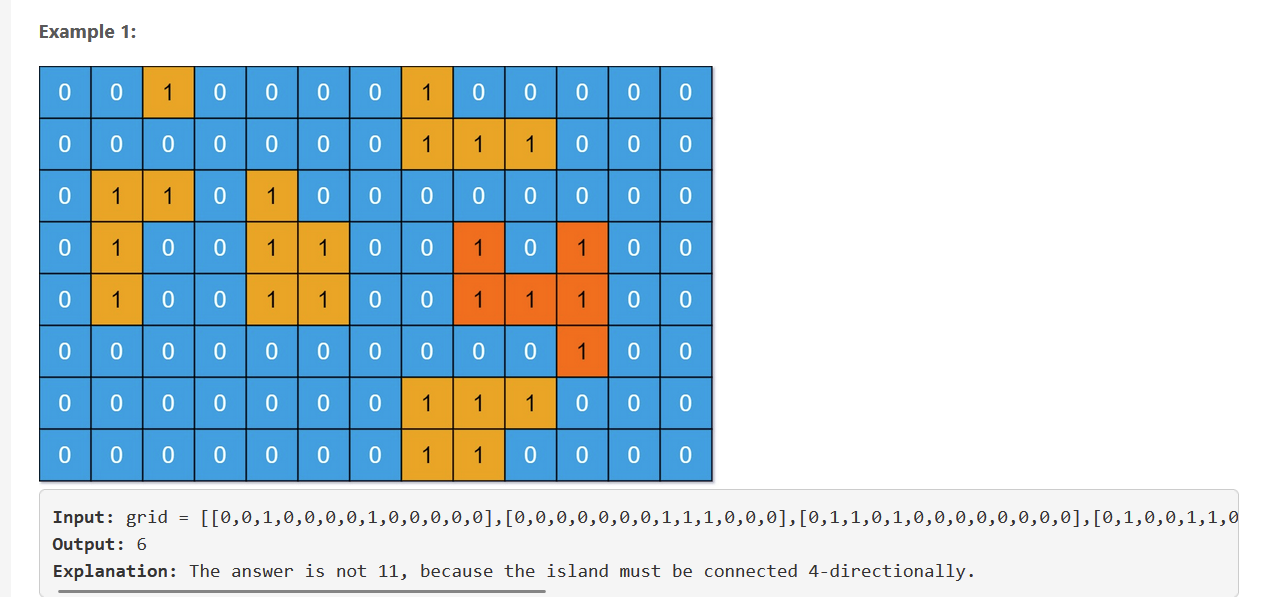

In [ ]:
class Solution:
    def maxAreaOfIsland(self, grid: List[List[int]]) -> int:
        
        
        def valid(row, col):
            
            return 0 <= row < m and 0 <= col < n and grid[row][col] == 1
                
        
        
        def dfs(row,col):
            ans = 1
            for dx, dy in directions:
                
                #notice why are we adding dy to row and dx to col
                next_row, next_col = row + dy, col + dx
                
                #very important step to terminate recursion
                if valid(next_row, next_col) and (next_row, next_col) not in seen:
                    seen.add((next_row, next_col))
                    #think why this becomes important
                    ans += dfs(next_row, next_col)
                    
            return(ans)
                
            
        
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        
        seen = set()
        ans = [0]
        
        m = len(grid)
        n = len(grid[0])
        
        
        for row in range(m):
            for col in range(n):
                #if you dont add grid[row][col] == 1 then ans = mxn
                if grid[row][col] == 1 and (row, col) not in seen:
                    seen.add((row, col))
                    ans.append(dfs(row, col))
        
        return(max(ans))

#### Reachable Nodes With Restrictions

There is an undirected tree with n nodes labeled from 0 to n - 1 and n - 1 edges.

You are given a 2D integer array edges of length n - 1 where edges[i] = [ai, bi] indicates that there is an edge between nodes ai and bi in the tree. You are also given an integer array restricted which represents restricted nodes.

Return the maximum number of nodes you can reach from node 0 without visiting a restricted node.

Note that node 0 will not be a restricted node.

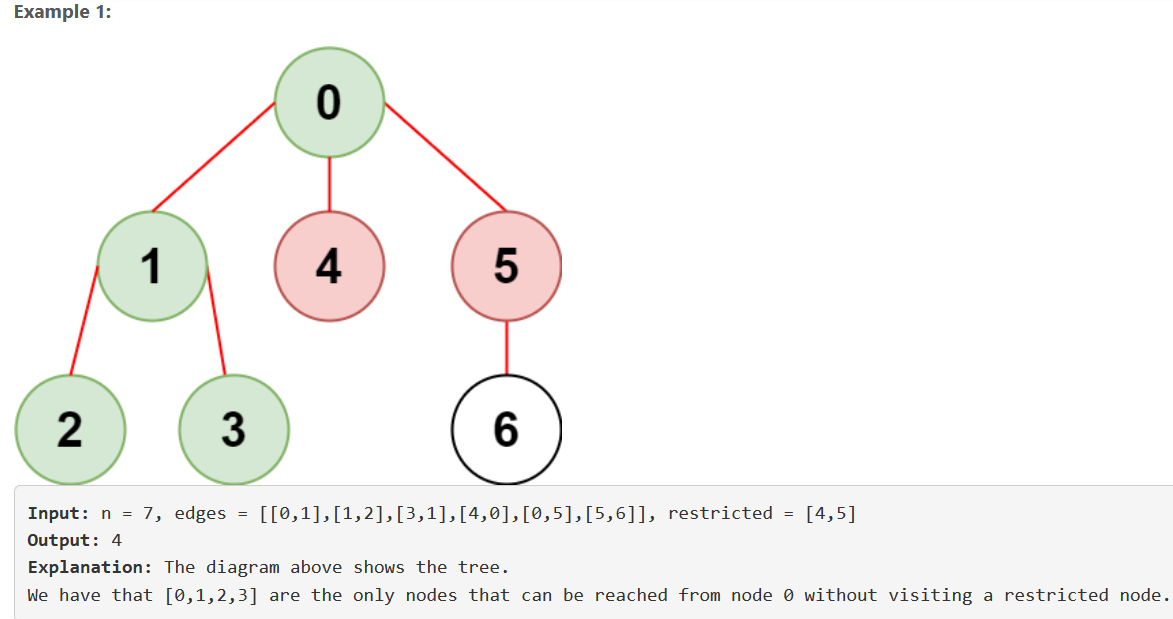

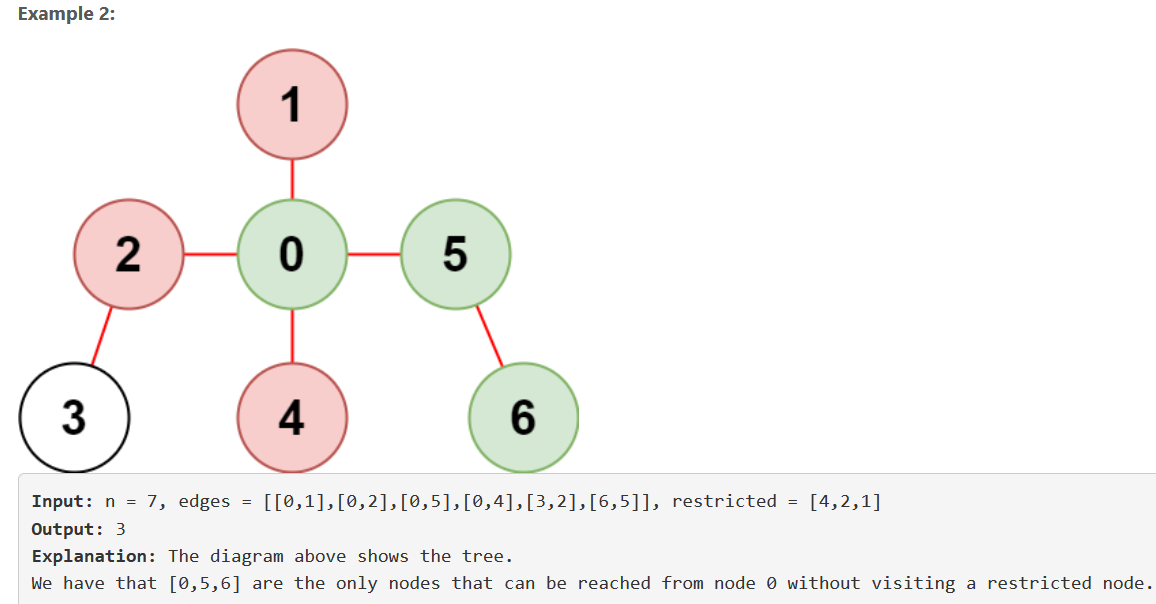

In [ ]:
class Solution:
    def reachableNodes(self, n: int, edges: List[List[int]], restricted: List[int]) -> int:      
        
        graph = defaultdict(list)        
        for x, y in edges:
            
                graph[x].append(y)
                graph[y].append(x)
        
        #Cool trick to optimise solution
        # Mark the nodes in 'restricted' as visited.
        seen = [False] * n
        for node in restricted:
            seen[node] = True
        
        
        def dfs(node):
            ans = 0
            for neighbor in graph[node]:
                if not seen[neighbor]:
                    seen[neighbor] = True
                    ans +=1
                    ans += dfs(neighbor) 
            return(ans)



        ans1 = dfs(0)
        if(ans1 == 0):return(1) 
        else: return(ans1)
        

#### BFS

Like with trees, in many graph problems, it doesn't really matter if you use DFS or BFS, and there are rarely scenarios where DFS performs better than BFS - people just choose DFS because it's faster/cleaner to implement, especially recursively. Every problem we looked at in the previous example could be solved with a BFS.

But, there are some problems where using BFS is clearly better than using DFS. In trees, this was the case when we were concerned with tree levels. In graphs, it is mostly the case when you are asked to find the shortest path.

Recall that in binary trees, BFS would visit all nodes at a depth d before visiting any node at a depth d + 1. BFS visited the nodes according to their distance from the root.

99% of the time, a graph will not have a tree structure. But even then, the same logic still applies. Imagine whatever node you start from as a "root". Then, the neighbors of the root represent the next level, and the neighbors of those nodes represent the level after that.

BFS on a graph always visits nodes according to their distance from the starting point. This is the key idea behind BFS on graphs - every time you visit a node, you must have reached it in the minimum steps possible from wherever you started your BFS.

In [4]:
# The above statement was always the case on binary trees, even if you did a DFS, 
# because there is only one possible path to any node from the root. 
# In a graph, there could be many paths from a given starting point to any other node. 
# Using BFS will ensure that out of all possible paths, you take the shortest one.

#### Example 6: 1091. Shortest Path in Binary Matrix

Given an n x n binary matrix grid, return the length of the shortest clear path in the matrix. 
If there is no clear path, return -1. A clear path is a path from the top-left cell (0, 0) 
to the bottom-right cell (n - 1, n - 1) such that all visited cells are 0. 
You may move 8-directionally (up, down, left, right, or diagonally).


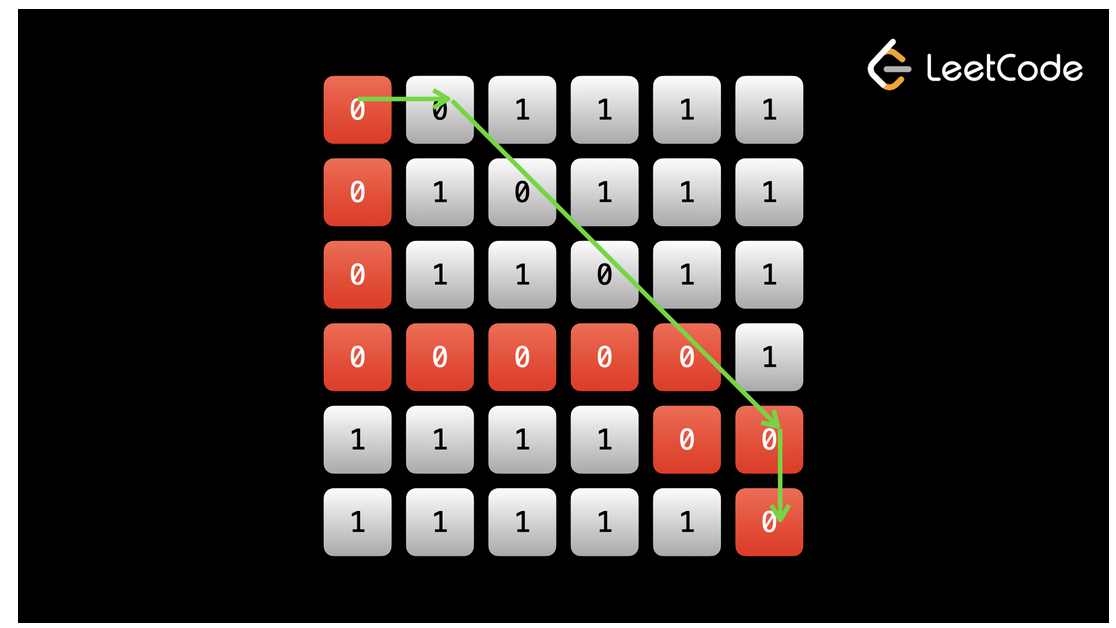

In [ ]:
#try dry running it based on FIFO concept of Queue implementation

from collections import deque

class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:
        if grid[0][0] == 1:
            return -1
        
        def valid(row, col):
            return 0 <= row < n and 0 <= col < n and grid[row][col] == 0
        
        n = len(grid)
        seen = {(0, 0)}
        queue = deque([(0, 0, 1)]) # row, col, steps
        directions = [(0, 1), (1, 0), (1, 1), (-1, -1), (-1, 1), (1, -1), (0, -1), (-1, 0)]
        
        while queue:
            row, col, steps = queue.popleft()
            if (row, col) == (n - 1, n - 1):
                return steps
            
            for dx, dy in directions:
                next_row, next_col = row + dy, col + dx
                if valid(next_row, next_col) and (next_row, next_col) not in seen:
                    seen.add((next_row, next_col))
                    queue.append((next_row, next_col, steps + 1))
        
        return -1

#### Example 7: 863. All Nodes Distance K in Binary Tree

Given the root of a binary tree, a target node target in the tree, and an integer k, 
return an array of the values of all nodes that have a distance k from the target node.


In a binary tree, we only have pointers from parents to children. We can easily find the nodes at distance k that are in the target node's subtree, but what about all the other nodes? Let's convert the tree into a graph by assigning every node a parent pointer. Then, the tree becomes an undirected graph, and we can use a simple BFS to find the nodes at distance k.

We can perform the parent assignments using either BFS or DFS - it doesn't really matter, so we'll use DFS. Then, we'll perform a BFS starting at target, and after we have reached k steps, we will return the nodes in the queue.

In [ ]:
from collections import deque

class Solution:
    def distanceK(self, root: TreeNode, target: TreeNode, k: int) -> List[int]:
        
        #amazing dfs to get all parents of the node and converst it into a undirected graph
        def dfs(node, parent):
            if not node:
                return
            
            node.parent = parent
            dfs(node.left, node)
            dfs(node.right, node)
        
        #this steps add parent information for each node    
        dfs(root, None)
        
        queue = deque([target])
        seen = {target}
        distance = 0
        
        while queue and distance < k:
            
            current_length = len(queue)
            
            for _ in range(current_length):
                node = queue.popleft()
                
                for neighbor in [node.left, node.right, node.parent]: #all three are neighbors for a node in a Binary Tree
                    if neighbor and neighbor not in seen:
                        seen.add(neighbor)
                        queue.append(neighbor)
            
            distance += 1
        
        return [node.val for node in queue]

#### Example 18: 542. 01 Matrix

Given an m x n binary (every element is 0 or 1) matrix mat, find the distance of the nearest 0 for each cell. The distance between adjacent cells (horizontally or vertically) is 1.

For example, given mat = [[0,0,0],[0,1,0],[1,1,1]], return [[0,0,0],[0,1,0],[1,2,1]].

For all 0, the distance is 0, so we don't need to change those. For all 1, we need to find the nearest 0. One way to solve this is to perform a BFS from each 1 that stops upon finding the first 0 - but this would be very inefficient. Imagine if you had a huge matrix with only 1. The time complexity would be O(m2⋅n2) (each BFS costs O(m⋅n) and we would need to perform O(m⋅n) different BFS if the entire matrix is only 1, except for a single 0 in a corner). Can we find a linear time approach that avoids visiting the same square multiple times?

Instead of performing the BFS from the ones, what if we started from the zeros? A critical observation is that if we have a square x with value 1 and its nearest square with value 0 is y, then it doesn't make a difference if we traverse from x -> y or y -> x, both take the same number of steps. If we perform a BFS starting from all the zeros, whenever we encounter a 1, we know that the current number of steps is the answer for that 1. Using seen will prevent the answer from being overridden. Below is a visualization of this process.

In [ ]:
from collections import deque

class Solution:
    def updateMatrix(self, mat: List[List[int]]) -> List[List[int]]:
        def valid(row, col):
            return 0 <= row < m and 0 <= col < n and mat[row][col] == 1
        
        # if you don't want to modify the input, you can create a copy at the start
        m = len(mat)
        n = len(mat[0])
        queue = deque()
        seen = set()
        
        #initially we just need to add all zeros in our queue
        for row in range(m):
            for col in range(n):
                if mat[row][col] == 0:
                    queue.append((row, col, 1))
                    seen.add((row, col))
        
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

        while queue:
            row, col, steps = queue.popleft()
            
            for dx, dy in directions:
                next_row, next_col = row + dy, col + dx
                if (next_row, next_col) not in seen and valid(next_row, next_col):
                    seen.add((next_row, next_col))
                    queue.append((next_row, next_col, steps + 1))
                    
                    #here we are updating our matrix as number of steps each cell is away from zero
                    mat[next_row][next_col] = steps
        
        return mat

#### Example 19: (HARD)1293. Shortest Path in a Grid with Obstacles Elimination

You are given an m x n integer matrix grid where each cell is either 0 (empty) or 1 (obstacle). You can move up, down, left, or right from and to an empty cell in one step. Return the minimum number of steps to walk from the upper left corner to the lower right corner given that you can eliminate at most k obstacles. If it is not possible, return -1.

This problem is almost the same as the first example we looked at in this article. We have a binary matrix, we are allowed to walk along one of the numbers, and we need to find the shortest path from top left to bottom right. The difference with this problem is that we are allowed to eliminate up to k obstacles.

Eliminating an obstacle is the same as walking over it. We can add another state variable remain that represents how many removals we have remaining. At each square, if a neighbor is an obstacle, we can still walk to it if remain > 0.

In [ ]:
#see video each time this is encountered

from collections import deque

class Solution:
    def shortestPath(self, grid: List[List[int]], k: int) -> int:
        def valid(row, col):
            return 0 <= row < m and 0 <= col < n
        
        m = len(grid)
        n = len(grid[0])
        queue = deque([(0, 0, k, 0)])
        seen = {(0, 0, k)}
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        
        while queue:
            row, col, remain, steps = queue.popleft()
            if row == m - 1 and col == n - 1:
                return steps
            
            for dx, dy in directions:
                next_row, next_col = row + dy, col + dx
                if valid(next_row, next_col):
                    if grid[next_row][next_col] == 0:
                        if (next_row, next_col, remain) not in seen:
                            seen.add((next_row, next_col, remain))
                            queue.append((next_row, next_col, remain, steps + 1))
                    # otherwise, it is an obstacle and we can only pass if we have remaining removals
                    elif remain and (next_row, next_col, remain - 1) not in seen:
                        seen.add((next_row, next_col, remain - 1))
                        queue.append((next_row, next_col, remain - 1, steps + 1))
        
        return -1

#### Example 20: (HARD) 1129. Shortest Path with Alternating Colors

You are given a directed graph with n nodes labeled from 0 to n - 1. Edges are red or blue in this graph. You are given redEdges and blueEdges, where redEdges[i] and blueEdges[i] both have the format [x, y] indicating an edge from x to y in the respective color. Return an array ans of length n, where answer[i] is the length of the shortest path from 0 to i where edge colors alternate, or -1 if no path exists.

In this problem, we start at node 0 and want to find the shortest path to all other nodes. Normally, a simple BFS with a steps variable can accomplish this easily. However, we have the added constraint that the edges we cross must be alternating in color. Let's assign RED = 0 and BLUE = 1. When we do BFS, we can store either RED or BLUE along with the node to indicate what color the last edge was. We can then perform a BFS starting from both (0, RED) and (0, BLUE).

Every time we traverse an edge, we need to first make sure that we are only considering edges of the correct color, and then when making the traversal we need to switch RED <-> BLUE.

In [2]:
# One neat trick to flip between 1 and 0 is f(x) = 1 - x. f(1) = 0 and f(0) = 1.

Whenever we introduce new state variables, we need to also include those variables in seen. So we treat (node, color) as one state and store those states in seen.

In [ ]:
class Solution:
    def shortestAlternatingPaths(self, n: int, redEdges: List[List[int]], blueEdges: List[List[int]]) -> List[int]:
        RED = 0
        BLUE = 1
        
        graph = defaultdict(lambda: defaultdict(list))
        for x, y in redEdges:
            graph[RED][x].append(y)
        for x, y in blueEdges:
            graph[BLUE][x].append(y)
        
        ans = [float("inf")] * n
        queue = deque([(0, RED, 0), (0, BLUE, 0)])
        seen = {(0, RED), (0, BLUE)}
        
        while queue:
            node, color, steps = queue.popleft()
            ans[node] = min(ans[node], steps)
            
            for neighbor in graph[color][node]:
                if (neighbor, 1 - color) not in seen:
                    seen.add((neighbor, 1 - color))
                    queue.append((neighbor, 1 - color, steps + 1))
        
        return [x if x != float("inf") else -1 for x in ans]

#### Nearest Exit from Entrance in Maze

You are given an m x n matrix maze (0-indexed) with empty cells (represented as '.') and walls (represented as '+'). You are also given the entrance of the maze, where entrance = [entrancerow, entrancecol] denotes the row and column of the cell you are initially standing at.

In one step, you can move one cell up, down, left, or right. You cannot step into a cell with a wall, and you cannot step outside the maze. Your goal is to find the nearest exit from the entrance. An exit is defined as an empty cell that is at the border of the maze. The entrance does not count as an exit.

Return the number of steps in the shortest path from the entrance to the nearest exit, or -1 if no such path exists.

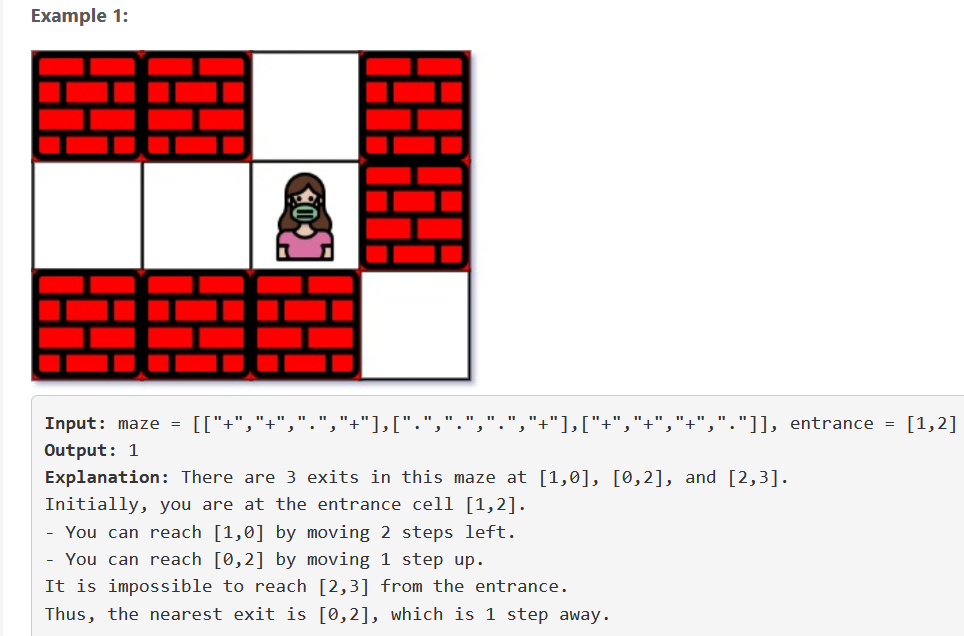

In [ ]:
class Solution:
    def nearestExit(self, maze: List[List[str]], entrance: List[int]) -> int:
        
        def valid(row, col):
            return 0 <= row < m and 0 <= col < n and maze[row][col]=='.'
        
        m = len(maze)
        n = len(maze[0])
        
        queue = deque([(entrance[0], entrance[1], 0)])
        seen = {(entrance[0], entrance[1])}
        
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        
        while(queue):
            
            row, col, steps = queue.popleft()
            # An exit is defined as an empty cell that is at the border of the maze. 
            # The entrance does not count as an exit.            
            
            if (((row == (m - 1)) | (col == (n - 1)) | (row == 0)| (col == 0)) & (maze[row][col]=='.') & (steps > 0)):
                return steps
            
            for dx, dy in directions:
                
                next_row, next_col = row + dy, col + dx
                if valid(next_row,next_col) and (next_row, next_col) not in seen:
                    seen.add((next_row, next_col))
                    queue.append((next_row, next_col, steps+1)) #note: increment of steps here
                    
        return -1

#### Implicit Graph

##### Example 21: 752. Open the Lock

You have a lock with 4 circular wheels. Each wheel has the digits 0 to 9. The wheels rotate and wrap around - so 0 can turn to 9 and 9 can turn to 0. Initially, the lock reads "0000". One move consists of turning a wheel one slot. You are given an array of blocked codes deadends - if the lock reads any of these codes, then it can no longer turn. Return the minimum number of moves to make the lock read target.


In this problem, we can consider each lock state as a node. The edges are all nodes that differ by only one position by a value of 1. For example, "5231" and "5331" are neighbors. From here, we can just perform a simple BFS from "0000", with the one condition that we cannot visit any nodes in deadends. For O(1) checking, let's turn deadends into a set before starting our BFS.

In [3]:
# To find the neighbors of a node, we can loop over each of the 4 slots, and each slot, 
# increment and decrement the slot by 1. To handle the wrap-around case, 
# we can use the modulo operator - decrement(x) = (x - 1) % 10 and increment(x) = (x + 1) % 10. 
# This works because decrement(0) = 9 and increment(9) = 0.



# Just to be a bit cleaner, we can put all the blocked codes from deadends in seen before starting BFS 
# instead of adding an additional if check for if a neighbor is in deadends.

In [ ]:
class Solution:
    def openLock(self, deadends: List[str], target: str) -> int:       
        
        #Unbelievable        
        def neighbors(node):
            ans = []
            for i in range(4):
                num = int(node[i])
                for change in [-1, 1]:
                    x = (num + change) % 10
                    ans.append(node[:i] + str(x) + node[i + 1:])
            
            return ans

        if "0000" in deadends:
            return -1
        
        queue = deque([("0000", 0)]) # first state, number of steps
        seen = set(deadends) 
        seen.add("0000") 
        
        while queue:
            node, steps = queue.popleft()
            if node == target:
                return steps
        
            for neighbor in neighbors(node):
                if neighbor not in seen:
                    seen.add(neighbor)
                    queue.append((neighbor, steps + 1))
        
        return -1

##### Example 22: 399. Evaluate Division

You are given an array equations and a number array values of the same length. equations[i] = [x, y] represents x / y = values[i]. You are also given an array queries where queries[i] = [a, b] which represents the quotient a / b. Return an array answer where answer[i] is the answer to the ithith query, or -1 if it cannot be determined.

For example, let's say we have equations = [["a", "b"], ["b", "c"]] and values = [2, 3]. This input represents a/b=2 and b/c=3. If we had a query ["a", "c"], the answer to that query would be 6, because we can deduce that a/c=6.

In [ ]:
from collections import defaultdict

class Solution:
    def calcEquation(self, equations: List[List[str]], values: List[float], queries: List[List[str]]) -> List[float]:
        
        def answer_query(start, end):
            # no info on this node
            if start not in graph:
                return -1
            
            seen = {start}
            stack = [(start, 1)]
            
            while stack:
                node, ratio = stack.pop()
                if node == end:
                    return ratio
                
                for neighbor in graph[node]:
                    if neighbor not in seen:
                        seen.add(neighbor)
                        stack.append((neighbor, ratio * graph[node][neighbor]))

            return -1
        
        #excellent use of defaultdict as dictionary with value of each key as a dictionary
        graph = defaultdict(dict)
        for i in range(len(equations)):
            numerator, denominator = equations[i]
            val = values[i]
            graph[numerator][denominator] = val
            graph[denominator][numerator] = 1 / val
        
        ans = []
        for numerator, denominator in queries:
            ans.append(answer_query(numerator, denominator))
        
        return ans

In [33]:
from collections import defaultdict
equations = [["a","b"],["b","c"]]
values = [2.0,3.0]

graph = defaultdict(dict)
for i in range(len(equations)):
    numerator, denominator = equations[i]
    val = values[i]
    graph[numerator][denominator] = val
    graph[denominator][numerator] = 1 / val
    
graph

defaultdict(dict,
            {'a': {'b': 2.0},
             'b': {'a': 0.5, 'c': 3.0},
             'c': {'b': 0.3333333333333333}})

##### Example 23: Minimum Genetic Mutation

A gene string can be represented by an 8-character long string, with choices from 'A', 'C', 'G', and 'T'.

Suppose we need to investigate a mutation from a gene string startGene to a gene string endGene where one mutation is defined as one single character changed in the gene string.

    For example, "AACCGGTT" --> "AACCGGTA" is one mutation.

There is also a gene bank bank that records all the valid gene mutations. A gene must be in bank to make it a valid gene string.

Given the two gene strings startGene and endGene and the gene bank bank, return the minimum number of mutations needed to mutate from startGene to endGene. If there is no such a mutation, return -1.

Note that the starting point is assumed to be valid, so it might not be included in the bank.

In [66]:
# Input: startGene = "AACCGGTT", endGene = "AACCGGTA", bank = ["AACCGGTA"]
# Output: 1

In [67]:
# Input: startGene = "AACCGGTT", endGene = "AAACGGTA", bank = ["AACCGGTA","AACCGCTA","AAACGGTA"]
# Output: 2

In [ ]:

class Solution:
    def minMutation(self, startGene: str, endGene: str, bank: List[str]) -> int:
        if endgene not in bank:
            return -1
        
        
        
        
        

##### Example 24: Jump Game III

Given an array of non-negative integers arr, you are initially positioned at start index of the array. When you are at index i, you can jump to i + arr[i] or i - arr[i], check if you can reach any index with value 0.

Notice that you can not jump outside of the array at any time.

In [68]:
# Ex:
# Input: arr = [4,2,3,0,3,1,2], start = 0
# Output: true 
# Explanation: 
# One possible way to reach at index 3 with value 0 is: 
# index 0 -> index 4 -> index 1 -> index 3

In [70]:
# Ex:
# Input: arr = [4,2,3,0,3,1,2], start = 5
# Output: true
# Explanation: 
# All possible ways to reach at index 3 with value 0 are: 
# index 5 -> index 4 -> index 1 -> index 3 
# index 5 -> index 6 -> index 4 -> index 1 -> index 3 

In [72]:
# Ex:
# Input: arr = [3,0,2,1,2], start = 2
# Output: false
# Explanation: There is no way to reach at index 1 with value 0.

##### Example 25: Detonate the Maximum Bombs

You are given a list of bombs. The range of a bomb is defined as the area where its effect can be felt. This area is in the shape of a circle with the center as the location of the bomb.

The bombs are represented by a 0-indexed 2D integer array bombs where bombs[i] = [xi, yi, ri]. xi and yi denote the X-coordinate and Y-coordinate of the location of the ith bomb, whereas ri denotes the radius of its range.

You may choose to detonate a single bomb. When a bomb is detonated, it will detonate all bombs that lie in its range. These bombs will further detonate the bombs that lie in their ranges.

Given the list of bombs, return the maximum number of bombs that can be detonated if you are allowed to detonate only one bomb.

##### Word Ladder

A transformation sequence from word beginWord to word endWord using a dictionary wordList is a sequence of words beginWord -> s1 -> s2 -> ... -> sk such that:

    Every adjacent pair of words differs by a single letter.
    Every si for 1 <= i <= k is in wordList. Note that beginWord does not need to be in wordList.
    sk == endWord

Given two words, beginWord and endWord, and a dictionary wordList, return the number of words in the shortest transformation sequence from beginWord to endWord, or 0 if no such sequence exists.

In [73]:
# Input: beginWord = "hit", endWord = "cog", wordList = ["hot","dot","dog","lot","log","cog"]
# Output: 5
# Explanation: One shortest transformation sequence is "hit" -> "hot" -> "dot" -> "dog" -> cog", which is 5 words long.

In [74]:
# Input: beginWord = "hit", endWord = "cog", wordList = ["hot","dot","dog","lot","log"]
# Output: 0
# Explanation: The endWord "cog" is not in wordList, therefore there is no valid transformation sequence.

#### Djikstra's-Algorithm

##### 1631. Path with Minimum Effort

In [11]:
# https://leetcode.com/problems/path-with-minimum-effort/description/

You are a hiker preparing for an upcoming hike. You are given heights, a 2D array of size rows x columns, where heights[row][col] represents the height of cell (row, col). You are situated in the top-left cell, (0, 0), and you hope to travel to the bottom-right cell, (rows-1, columns-1) (i.e., 0-indexed). You can move up, down, left, or right, and you wish to find a route that requires the minimum effort.

A route's effort is the maximum absolute difference in heights between two consecutive cells of the route.

Return the minimum effort required to travel from the top-left cell to the bottom-right cell.

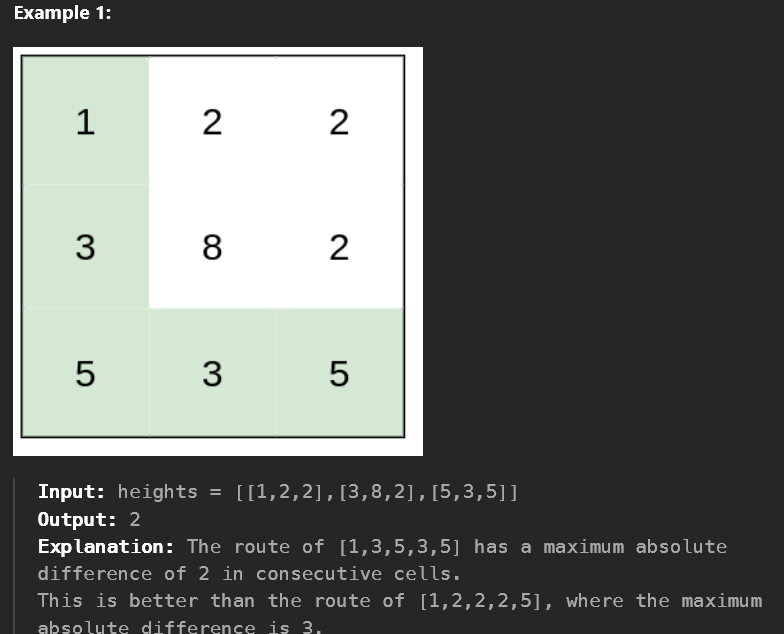

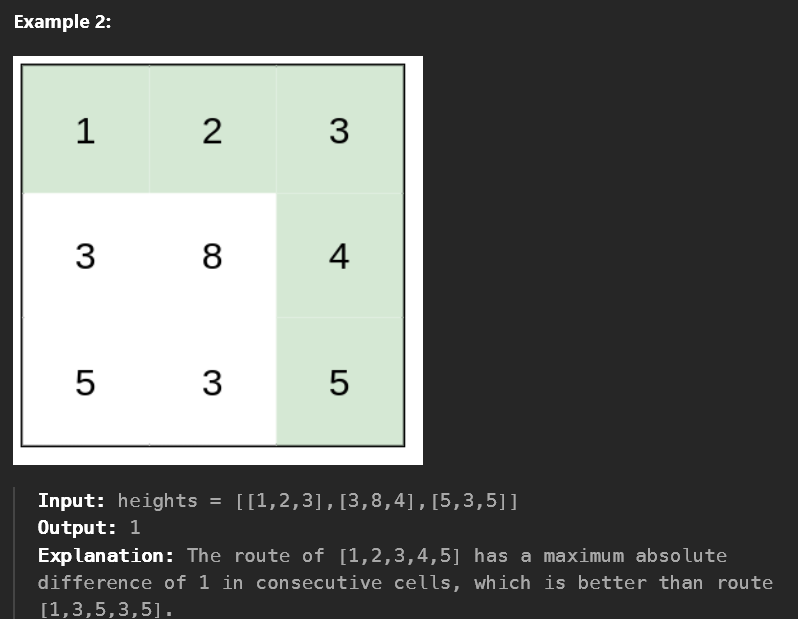

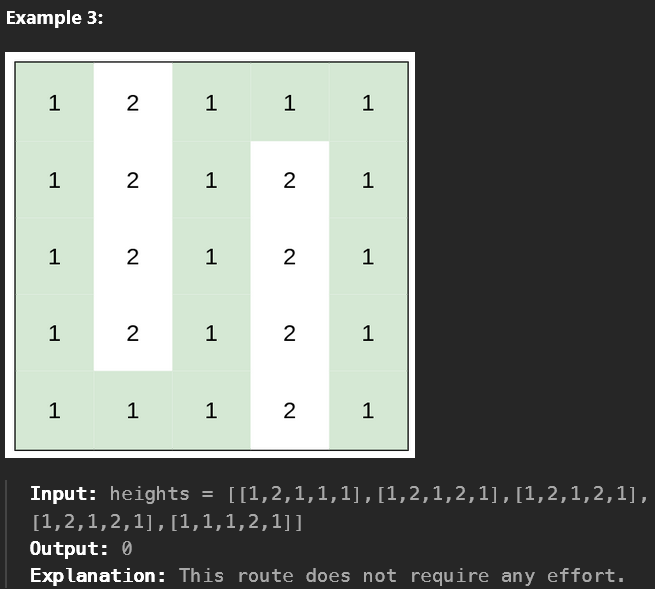

In [36]:
# heights = [[1,2,2],[3,8,2],[5,3,5]]
# heights = [[1,2,3],[3,8,4],[5,3,5]]
# heights = [[1,2,1,1,1],[1,2,1,2,1],[1,2,1,2,1],[1,2,1,2,1],[1,1,1,2,1]]
heights = [[4,3,4,10,5,5,9,2],[10,8,2,10,9,7,5,6],[5,8,10,10,10,7,4,2],[5,1,3,1,1,3,1,9],[6,4,10,6,10,9,4,6]]


def minimumEffortPath(heights):
        import numpy as np
        
        def valid(row, col):
            return 0 <= row < m and 0 <= col < n

        
        directions = [(0,1),(1,0),(0,-1),(-1,0)]
        
        seen = {(0,0)}
        
        queue = deque([(0,0,0)]) # row,col,cur_ht: cur_ht denotes delta from previous step
        m = len(heights)
        n = len(heights[0])
        
        if(m*n ==1):return(0) #single peak
        if(m==1): #single row
            return(max(heights[0])-min(heights[0]))
        
        heights1 = [[math.inf for _ in range(n)] for _ in range(m)]
                
        

        while queue:
            
            row, col, cur_ht = queue.popleft()
            
            # if row == m-1 and col == n-1:
            #     ans.append(cur_ht)
            
            for dx, dy in directions:
                next_row, next_col = row + dy, col + dx
                
                if valid(next_row, next_col) and (next_row, next_col) not in seen:
                    
                    seen.add((row, col))
                    
                    ht_delta = abs(heights[row][col]-heights[next_row][next_col])                   
                    
                        
                    if(heights1[next_row][next_col] >= ht_delta):
                            heights1[next_row][next_col] = ht_delta
                            
                    if  ht_delta >= cur_ht:
                        queue.append((next_row, next_col, ht_delta))
                        
                    else: 
                        queue.append((next_row, next_col,cur_ht))

        return(heights1[m-1][n-1])
    
minimumEffortPath(heights)

2

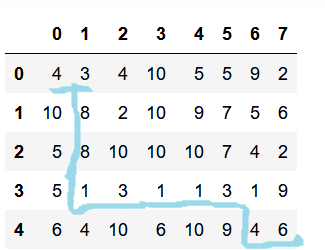

In [19]:
#Expected ans = 5, code below gave output as 2
heights = [[4,3,4,10,5,5,9,2],[10,8,2,10,9,7,5,6],[5,8,10,10,10,7,4,2],[5,1,3,1,1,3,1,9],[6,4,10,6,10,9,4,6]]

def minimumEffortPath(heights):



    def valid(row, col):
        return 0 <= row < m and 0 <= col < n


    directions = [(0,1),(1,0),(0,-1),(-1,0)]

    seen = {(0,0)}

    queue = deque([(0,0,0)]) # row, col ,cur_ht: cur_ht denotes delta from previous step
    
    m = len(heights)
    n = len(heights[0])

    if(m*n ==1):return(0)
    if(m==1):
        return(max(heights[0])-min(heights[0])) 



    heights1 = [[math.inf for _ in range(n)] for _ in range(m)]           
    heights1[0][0] = 0

    while queue:

        row, col, cur_ht = queue.popleft()

        if row == m-1 and col == n-1:
            return(heights1[m-1][n-1], heights1)

        for dx, dy in directions:
            next_row, next_col = row + dy, col + dx

            if valid(next_row, next_col) and (next_row, next_col) not in seen:

                seen.add((row, col))

                ht_delta = abs(heights[row][col]-heights[next_row][next_col])                   


                if(heights1[next_row][next_col] >= ht_delta):

                        heights1[next_row][next_col] = ht_delta

                if  ht_delta >= cur_ht:
                    queue.append((next_row, next_col, ht_delta))

                else: 
                    queue.append((next_row, next_col,cur_ht))

    return(heights1[m-1][n-1], heights1)


ans, heights1 = minimumEffortPath(heights)
ans

2

In [20]:
heights1

[[0, 1, 1, 6, 5, 0, 4, 7],
 [6, 2, 2, 0, 1, 2, 2, 1],
 [5, 0, 2, 0, 0, 0, 1, 2],
 [0, 4, 2, 2, 0, 2, 2, 7],
 [1, 2, 6, 4, 4, 1, 3, 2]]

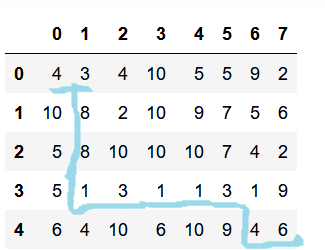

In [37]:
from heapq import *

heights = [[4,3,4,10,5,5,9,2],[10,8,2,10,9,7,5,6],[5,8,10,10,10,7,4,2],
           [5,1,3,1,1,3,1,9],[6,4,10,6,10,9,4,6]]

def minimumEffortPath(heights):

        rows, cols = len(heights), len(heights[0])

        directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

        dist = [[math.inf for _ in range(cols)] for _ in range(rows)]

        dist[0][0] = 0

        minHeap = [(0, 0, 0)] 

        

        while minHeap:

            effort, x, y = heappop(minHeap)



            if x == rows - 1 and y == cols - 1:

                return (effort)

            

            for dx, dy in directions:

                nx, ny = x + dx, y + dy

                

                if 0 <= nx < rows and 0 <= ny < cols:

                    new_effort = max(effort, abs(heights[x][y] - heights[nx][ny]))

                    

                    if new_effort < dist[nx][ny]:

                        dist[nx][ny] = new_effort

                        heappush(minHeap, (new_effort, nx, ny))
                        
ans = minimumEffortPath(heights)
ans

5

In [60]:
pd.DataFrame([[1,2,1,1,1],[1,2,1,2,1],[1,2,1,2,1],[1,2,1,2,1],[1,1,1,2,1]])

,0,1,2,3,4
0,1,2,1,1,1
1,1,2,1,2,1
2,1,2,1,2,1
3,1,2,1,2,1
4,1,1,1,2,1


In [61]:
#Expected ans = 5, code below gave output as 2
# heights = [[4,3,4,10,5,5,9,2],[10,8,2,10,9,7,5,6],[5,8,10,10,10,7,4,2],[5,1,3,1,1,3,1,9],[6,4,10,6,10,9,4,6]]
# heights = [[1,2,2],[3,8,2],[5,3,5]]
# heights = [[1,2,3],[3,8,4],[5,3,5]]
heights = [[1,2,1,1,1],[1,2,1,2,1],[1,2,1,2,1],[1,2,1,2,1],[1,1,1,2,1]]

def minimumEffortPath(heights):



    def valid(row, col):
        return 0 <= row < m and 0 <= col < n


    directions = [(0,1),(1,0),(0,-1),(-1,0)]

    seen = {(0,0)}

    queue = deque([(0,0,0)]) # row, col ,cur_ht: cur_ht denotes delta from previous step
    
    m = len(heights)
    n = len(heights[0])

    if(m*n ==1):
        return(0)
    if(m==1):
        return(max(heights[0])-min(heights[0])) 



    heights1 = [[math.inf for _ in range(n)] for _ in range(m)]           
    heights1[0][0] = 0

    while queue:

        row, col, cur_ht = queue.popleft()

#         if row == m-1 and col == n-1:
#             return(queue)

        for dx, dy in directions:
            next_row, next_col = row + dy, col + dx

            if valid(next_row, next_col) and (next_row, next_col) not in seen:

                seen.add((row, col))

#                 ht_delta = abs(heights[row][col]-heights[next_row][next_col]) 

                  #Why should we have the following step ?
                ht_delta = max(cur_ht, abs(heights[row][col] - heights[next_row][next_col]))

                if(heights1[next_row][next_col] > ht_delta):

                        heights1[next_row][next_col] = ht_delta                
                        queue.append((next_row, next_col, ht_delta))

                

    return(heights1[m-1][n-1], heights1)


z,x = minimumEffortPath(heights)
z

1